In [1]:
import numpy as np
import pandas as pd
import pingouin as pg
import glob
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 10)
from scipy import stats
import heapq
import matplotlib
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
import seaborn as sns
matplotlib.rcParams['figure.dpi']= 600
from copy import deepcopy

In [2]:
%matplotlib inline

In [3]:
neuronal_cCREs_df = pd.read_csv('../results/cCREs/phastCons.strict_neuronal.tsv',sep='\t',index_col='name')

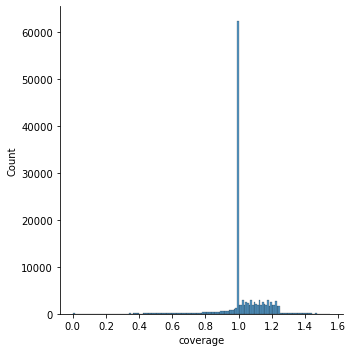

In [4]:
sns.displot(neuronal_cCREs_df,x='coverage',binwidth=0.01)

In [5]:
NonN_cCREs_df = pd.read_csv('../results/cCREs/phastCons.strict_NonN.tsv',sep='\t',index_col='name')

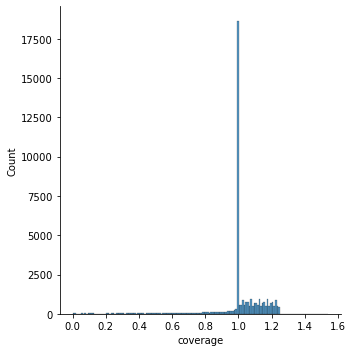

In [6]:
sns.displot(NonN_cCREs_df,x='coverage',binwidth=0.01)

In [7]:
neuronal_high_coverage_df=neuronal_cCREs_df[neuronal_cCREs_df['coverage']>=0.8]
NonN_high_coverage_df=NonN_cCREs_df[NonN_cCREs_df['coverage']>=0.8]

In [8]:
neuronal_high_coverage_df.shape

(131482, 4)

In [9]:
NonN_high_coverage_df.shape

(37774, 4)

In [19]:
NonN_high_coverage_df.to_csv('../results/cCREs/phastCons.high_coverage.strict_NonN.tsv',sep='\t')
neuronal_high_coverage_df.to_csv('../results/cCREs/phastCons.high_coverage.strict_neuronal.tsv',sep='\t')

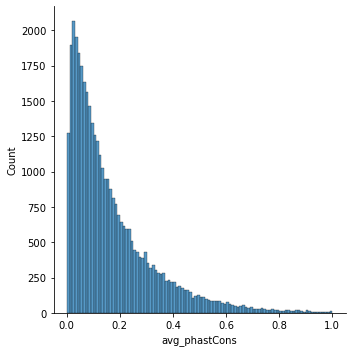

In [10]:
sns.displot(NonN_high_coverage_df,x='avg_phastCons',binwidth=0.01)

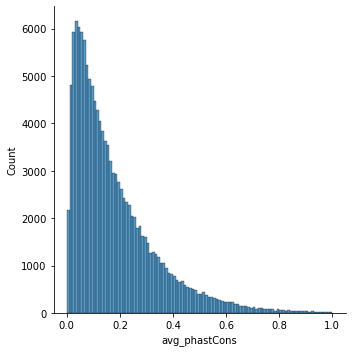

In [11]:
sns.displot(neuronal_high_coverage_df,x='avg_phastCons',binwidth=0.01)

In [14]:
NonN_high_coverage_df['avg_phastCons'].median()

0.11801700000000001

In [15]:
neuronal_high_coverage_df['avg_phastCons'].median()

0.133502

In [83]:
neuronal_high_coverage_df.shape

(131482, 5)

In [84]:
NonN_high_coverage_df.shape

(37774, 5)

In [13]:
stats.mannwhitneyu(NonN_high_coverage_df['avg_phastCons'],neuronal_high_coverage_df['avg_phastCons'])

MannwhitneyuResult(statistic=2323641485.0, pvalue=4.017613717740247e-81)

In [16]:
stats.ranksums(NonN_high_coverage_df['avg_phastCons'],neuronal_high_coverage_df['avg_phastCons'])

RanksumsResult(statistic=-19.07573158555914, pvalue=4.0176091450196486e-81)

In [20]:
NonN_high_coverage_df['Celltype']='Non-neuronal'

<ipython-input-20-630016458454>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NonN_high_coverage_df['Celltype']='Non-neuronal'


In [22]:
neuronal_high_coverage_df['Celltype']='Neuronal'

<ipython-input-22-e2a7cd174143>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neuronal_high_coverage_df['Celltype']='Neuronal'


In [23]:
data=pd.concat([neuronal_high_coverage_df,NonN_high_coverage_df])

In [24]:
palette={'Non-neuronal':'tab:green','Neuronal':'tab:red'}

In [81]:
matplotlib.rcParams['figure.dpi']= 600

In [76]:
sns.set_style('ticks')

In [43]:
data

,length,avg_phastCons,coverage,std,Celltype
name,,,,,
cCREs284,1701,0.202438,1.184010,0.266773,Neuronal
cCREs1751,1096,0.189419,0.994526,0.233548,Neuronal
cCREs2895,949,0.441498,1.000000,0.471978,Neuronal
cCREs3835,730,0.626041,1.000000,0.433303,Neuronal
cCREs3836,1423,0.769831,1.000000,0.382832,Neuronal
...,...,...,...,...,...
cCREs489993,501,0.139559,1.015970,0.273133,Non-neuronal
cCREs490896,501,0.239927,0.970060,0.261287,Non-neuronal
cCREs490908,501,0.219713,1.221560,0.364334,Non-neuronal


[None]

(0.001, 5)

[Text(0, 0.5, 'cCREs phastCons scores'), Text(0.5, 0, 'Cell Type')]

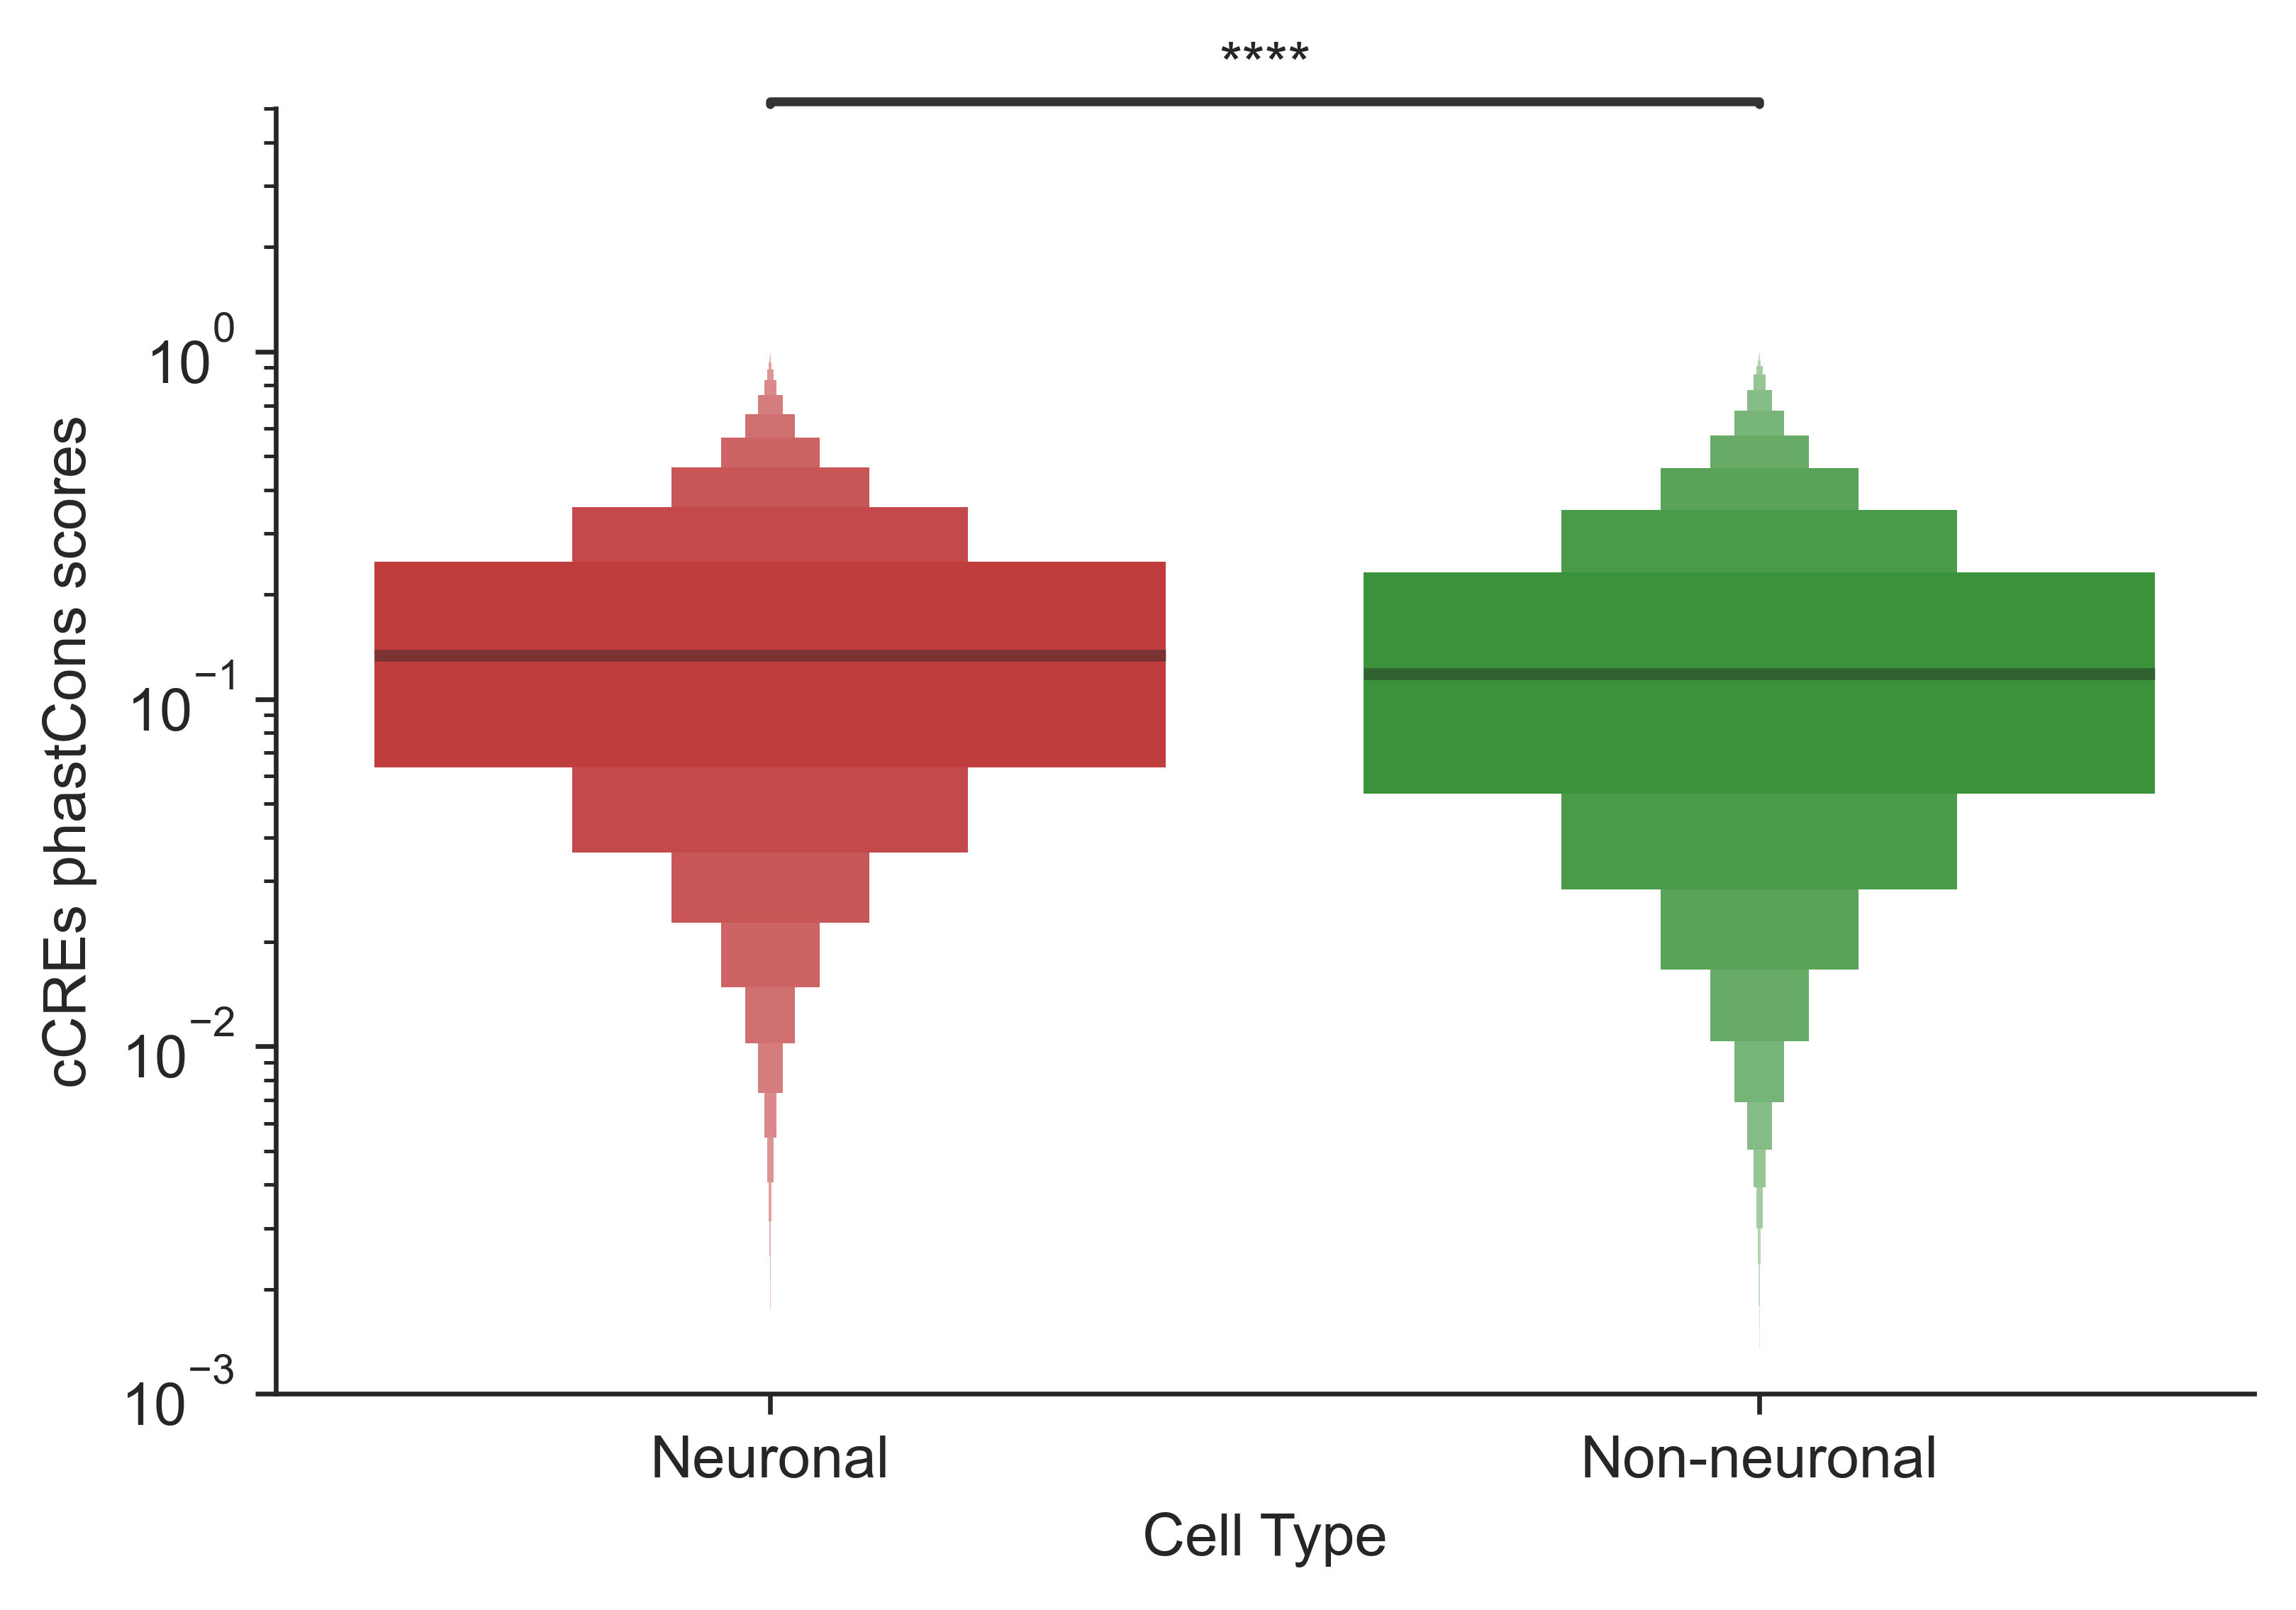

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(yscale='log')
ax.set_ylim(0.001,5)
ax = sns.boxenplot(x='Celltype',y='avg_phastCons',data=data,palette=palette,showfliers=False,order=['Neuronal','Non-neuronal'],linewidth=0)
l1=ax.lines[0]
l1.set_linewidth(2)
l2=ax.lines[1]
l2.set_linewidth(2)
ax.set(ylabel='cCREs phastCons scores',xlabel='Cell Type')

stats = add_stat_annotation(ax=ax,data=data,x='Celltype',y='avg_phastCons',
                           box_pairs=[('Neuronal','Non-neuronal')],
                           test='Mann-Whitney',text_format='star',
                           loc='outside',verbose=0)

sns.despine()

plt.savefig('../figures/MannWhitney/phastcons/cCREs.pdf')
plt.savefig('../figures/MannWhitney/phastcons/cCREs.svg')
plt.show()